## **Data Analysis & Visualization in Finance - Technical Analysis of Stocks using Python**
How to use Python libraries like Pandas, Matplotlib and Seaborn to derive insights from daily price-volume stock market data

### **1. About Data**
For this analysis, we utilize **2 years of historical data** (from mid-February 2018 to February 2020). The stocks selected are listed on the [National Stock Exchange (NSE)](https://www1.nseindia.com/global/content/about_us/about-us.htm).

The following stocks were chosen to ensure diversity across different sectors and market capitalizations:

* **HDFC Ltd.** (Housing Development Finance Corporation)
* **Sun Pharmaceutical Industries Ltd.**
* **Tata Consultancy Services Ltd. (TCS)**
* **Jindal Steel & Power Ltd.**
* **Jubilant FoodWorks Ltd.**

To begin our investigation, we will focus on **HDFC Ltd.** individually before proceeding to a combined portfolio analysis.
**Data Source:**
The historical data for HDFC stock used in this section has been sourced from [Yahoo Finance](https://in.finance.yahoo.com/).

### **2. Environment Setup & Library Import**
Setting up the analysis environment with necessary libraries for data manipulation, visualization, and data extraction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
file_path = 'Salinan HDFCBANK.NS.csv'

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file name or path.")

df.head()


Data loaded successfully!
Total rows: 491, Total columns: 7


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.849976,947.375000,937.500000,940.950012,927.139465,2457612.0
1,2018-02-16,941.950012,947.424988,937.825012,939.299988,925.513611,1791760.0
2,2018-02-19,941.299988,943.799988,929.525024,939.099976,925.316528,1827276.0
3,2018-02-20,942.375000,942.924988,929.400024,931.599976,917.926697,2042034.0
4,2018-02-21,933.974976,934.275024,926.099976,928.700012,915.069214,1376536.0


### **3. Data Preprocessing & Cleaning**
Before diving into analysis, we must ensure data integrity.
* **Date Conversion:** Converting the 'Date' column to datetime objects for time-series analysis.
* **Null Check:** identifying and removing missing values to prevent calculation errors.

In [2]:
print("--- Data Types Before Fix ---")
print(df.info())

if df.index.name != 'Date':
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
print("\n--- Data Types After Fix ---")
print(df.info())

print("\n--- Missing Data Check ---")
print(df.isna().sum())

--- Data Types Before Fix ---
<class 'pandas.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       491 non-null    str    
 1   Open       490 non-null    float64
 2   High       490 non-null    float64
 3   Low        490 non-null    float64
 4   Close      490 non-null    float64
 5   Adj Close  490 non-null    float64
 6   Volume     490 non-null    float64
dtypes: float64(6), str(1)
memory usage: 27.0 KB
None

--- Data Types After Fix ---
<class 'pandas.DataFrame'>
DatetimeIndex: 491 entries, 2018-02-15 to 2020-02-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       490 non-null    float64
 1   High       490 non-null    float64
 2   Low        490 non-null    float64
 3   Close      490 non-null    float64
 4   Adj Close  490 non-null    float64
 5   Volume     490 non-null    float64
d

### **4. Exploratory Data Analysis (EDA): HDFC Bank**
Visualizing the historical price movement of HDFC Bank to understand the general trend over the 2-year period.

Missing data found on dates:
DatetimeIndex(['2019-10-27'], dtype='datetime64[us]', name='Date', freq=None)

Data cleaned! Remaining rows: 490


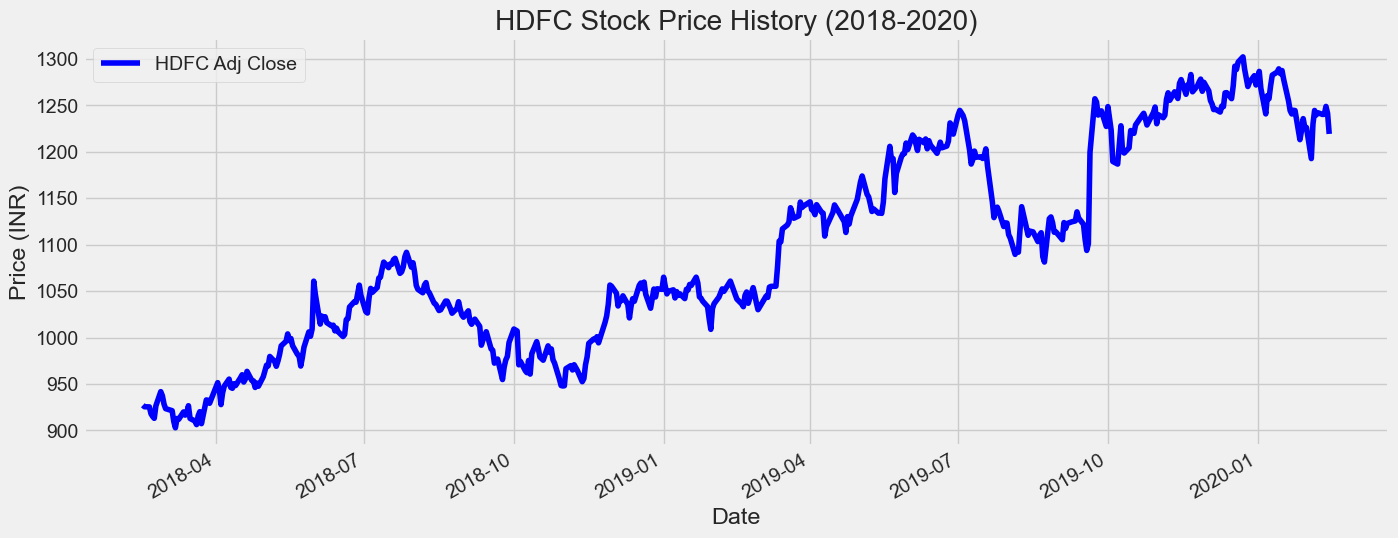

In [3]:
null_data = df[df.isnull().any(axis=1)]
print("Missing data found on dates:")
print(null_data.index)

df.dropna(inplace=True)
print(f"\nData cleaned! Remaining rows: {len(df)}")

plt.figure(figsize=(15, 6))
df['Adj Close'].plot(legend=True, label='HDFC Adj Close', color='blue')

plt.title('HDFC Stock Price History (2018-2020)')
plt.ylabel('Price (INR)')
plt.xlabel('Date')
plt.show()

### **5. Technical Analysis: Trend Identification**
Using **Moving Averages (MA)** to smooth out price volatility and identify trends:
* **MA 10 (Short Term):** Captures short-term momentum.
* **MA 50 (Medium Term):** Identifies the broader trend direction.

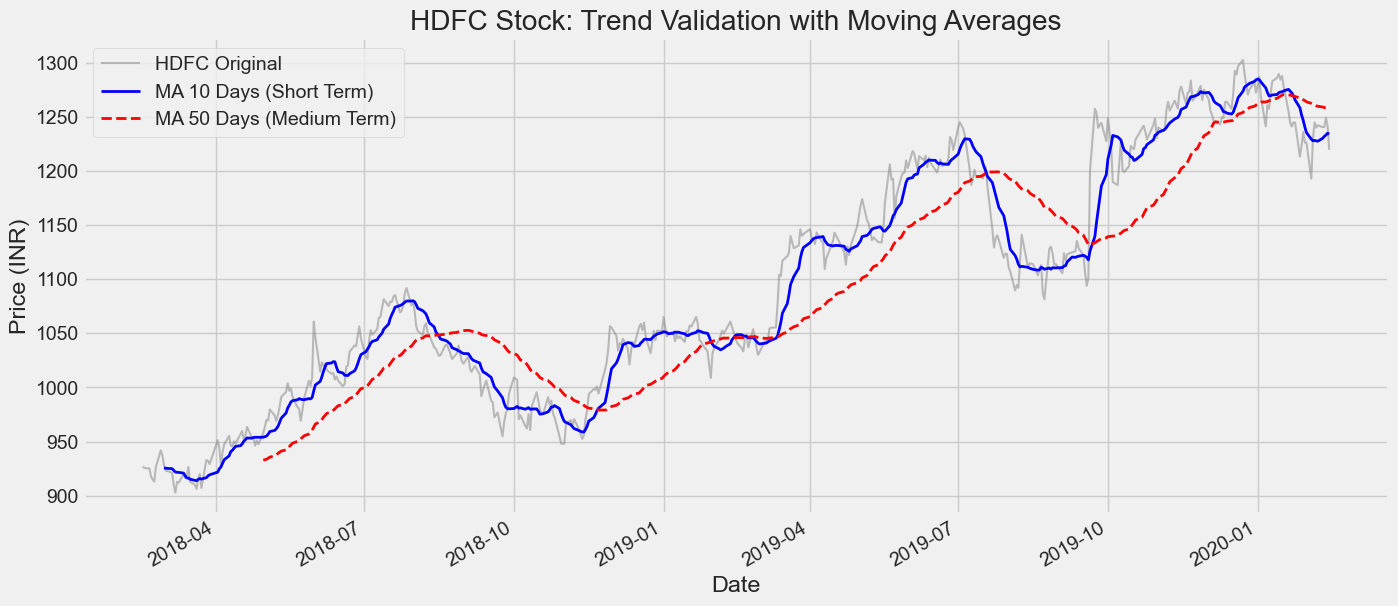

In [4]:
df['MA_10'] = df['Adj Close'].rolling(window=10).mean()
df['MA_50'] = df['Adj Close'].rolling(window=50).mean()
plt.figure(figsize=(15, 7))
df['Adj Close'].plot(label='HDFC Original', alpha=0.5, linewidth=1.5, color='gray')

df['MA_10'].plot(label='MA 10 Days (Short Term)', color='blue', linewidth=2)
df['MA_50'].plot(label='MA 50 Days (Medium Term)', color='red', linewidth=2, linestyle='--')

plt.title('HDFC Stock: Trend Validation with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

### **6. Risk Analysis: Volatility Check**
Analyzing the distribution of **Daily Returns** to understand the stock's stability.
* **Bell Curve:** A narrow curve indicates stability, while a wide curve implies high volatility (risk).

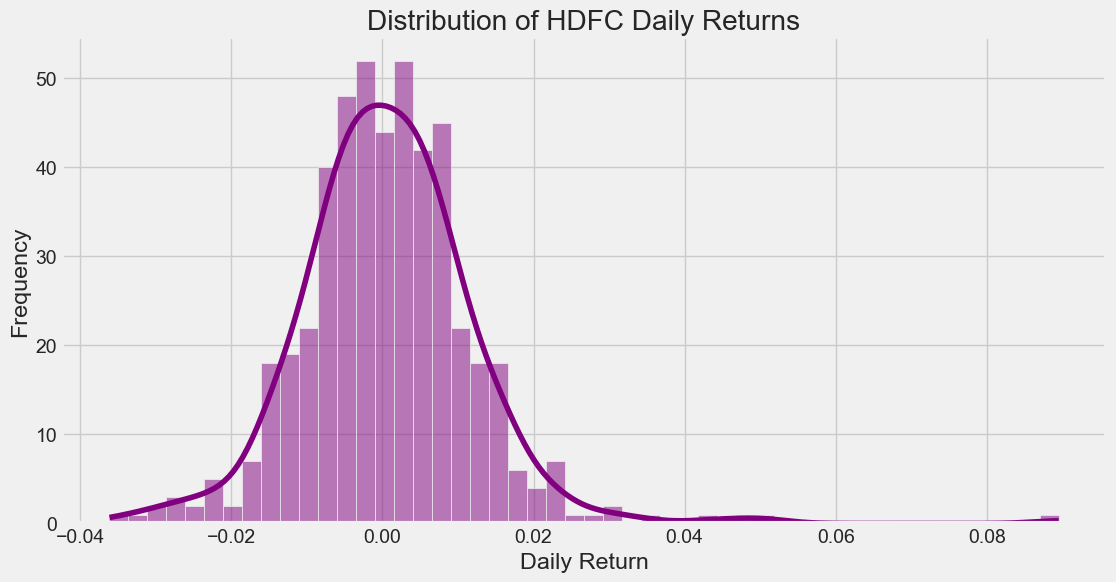

Average Daily Return: 0.0006272386353347262
Standard Deviation (Risk): 0.011623584322956388
Worst Single-Day Return: -0.03614191760642893
Best Single-Day Return: 0.08950540176580124


In [5]:
df['Daily Return'] = df['Adj Close'].pct_change()

plt.figure(figsize=(12, 6))
sns.histplot(df['Daily Return'].dropna(), bins=50, color='purple', kde=True)

plt.title('Distribution of HDFC Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

print("Average Daily Return:", df['Daily Return'].mean())
print("Standard Deviation (Risk):", df['Daily Return'].std())
print("Worst Single-Day Return:", df['Daily Return'].min())
print("Best Single-Day Return:", df['Daily Return'].max())

### **7. Investment Growth (Cumulative Return)**
Calculating the hypothetical growth of an investment made at the start of the period.
* **Metric:** Cumulative Product of daily returns.

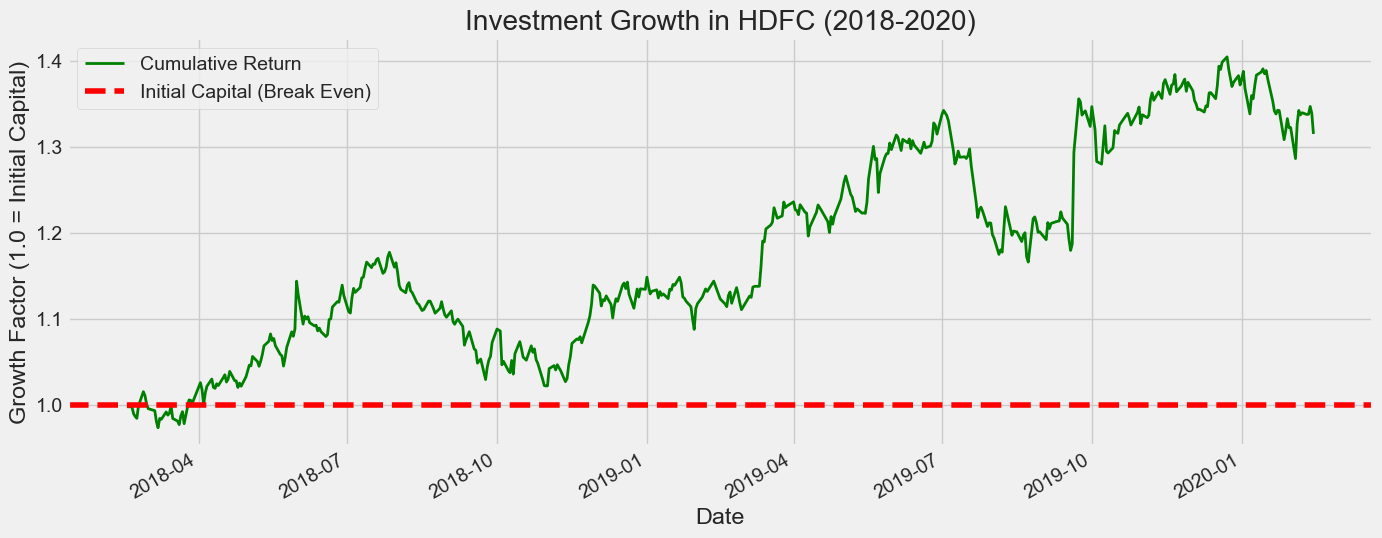

Final Investment Value: 1.315174277475072


In [6]:
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()
plt.figure(figsize=(15, 6))
df['Cumulative Return'].plot(color='green', linewidth=2)

plt.title('Investment Growth in HDFC (2018-2020)')
plt.ylabel('Growth Factor (1.0 = Initial Capital)')
plt.xlabel('Date')

plt.axhline(y=1, color='red', linestyle='--', label='Initial Capital (Break Even)')
plt.legend()
plt.show()
print("Final Investment Value:", df['Cumulative Return'].iloc[-1])

## **Part 2: Portfolio Analysis (Comparative Study)**
Expanding the scope to compare HDFC Bank against 4 other major stocks across different sectors using data fetched directly from **Yahoo Finance API**.

In [7]:
import yfinance as yf

tickers = ['HDFCBANK.NS', 'SUNPHARMA.NS', 'TCS.NS', 'JINDALSTEL.NS', 'JUBLFOOD.NS']
print("Fetching data from Yahoo Finance server...")
raw_data = yf.download(tickers, start='2018-02-15', end='2020-02-15')
f_combined = raw_data['Close']
df_combined = f_combined

print("\nData downloaded successfully!")
print(df_combined.head())
print("\nCheck for missing data:")
print(df_combined.isna().sum())

Fetching data from Yahoo Finance server...


[*********************100%***********************]  5 of 5 completed


Data downloaded successfully!
Ticker      HDFCBANK.NS  JINDALSTEL.NS  JUBLFOOD.NS  SUNPHARMA.NS       TCS.NS
Date                                                                          
2018-02-15   439.081970     261.652161   197.317093    533.247803  1201.417969
2018-02-16   438.311981     247.995163   191.408066    532.784546  1204.374023
2018-02-19   438.218658     246.516068   195.546783    519.957031  1200.494019
2018-02-20   434.718903     248.488205   195.875366    518.197205  1209.179077
2018-02-21   433.365662     243.853699   195.198639    486.938751  1249.235107

Check for missing data:
Ticker
HDFCBANK.NS      0
JINDALSTEL.NS    0
JUBLFOOD.NS      0
SUNPHARMA.NS     0
TCS.NS           0
dtype: int64


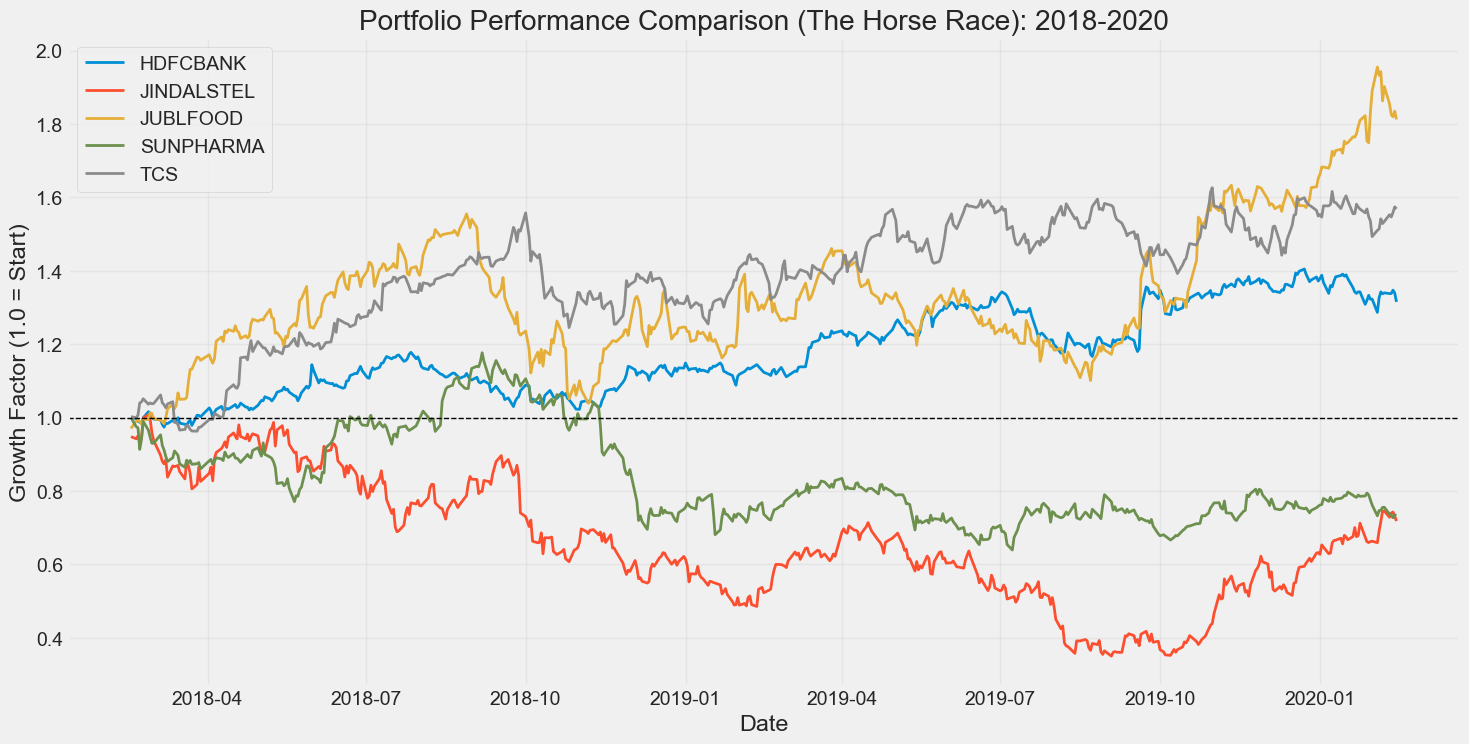

In [8]:
rets = df_combined.pct_change().dropna()
cumulative_returns = (1 + rets).cumprod()

plt.figure(figsize=(16, 8))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns[col], label=col.replace('.NS', ''), linewidth=2)

plt.title('Portfolio Performance Comparison (The Horse Race): 2018-2020')
plt.ylabel('Growth Factor (1.0 = Start)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
plt.show()

### **8. Market Correlation Analysis**
Checking how these stocks move in relation to each other.
* **Goal:** Identify stocks that are not highly correlated to build a diversified portfolio.

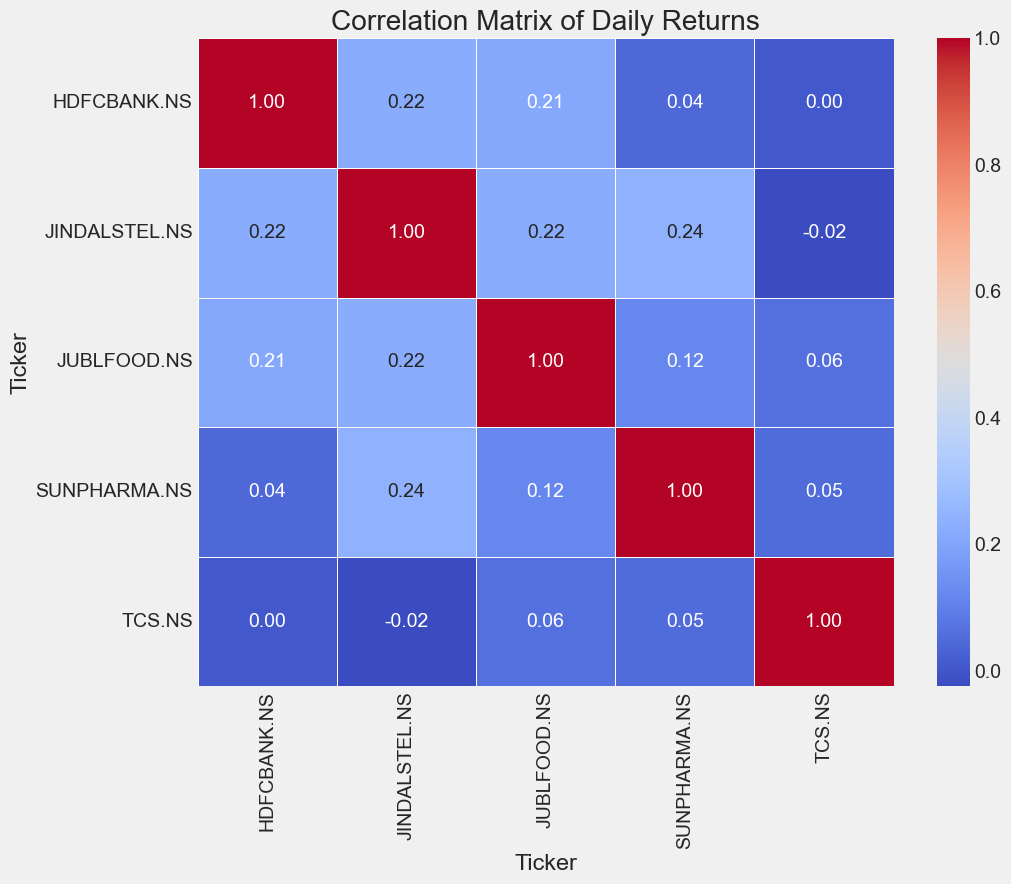

In [9]:
rets = df_combined.pct_change().dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(rets.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Daily Returns')
plt.show()


### **9. Risk vs. Reward Trade-off**
The ultimate comparison to find the best investment opportunities.
* **Y-Axis:** Expected Return (Higher is better).
* **X-Axis:** Risk/Volatility (Lower is better).
* **Ideal Stock:** Located in the **Top-Left** quadrant.

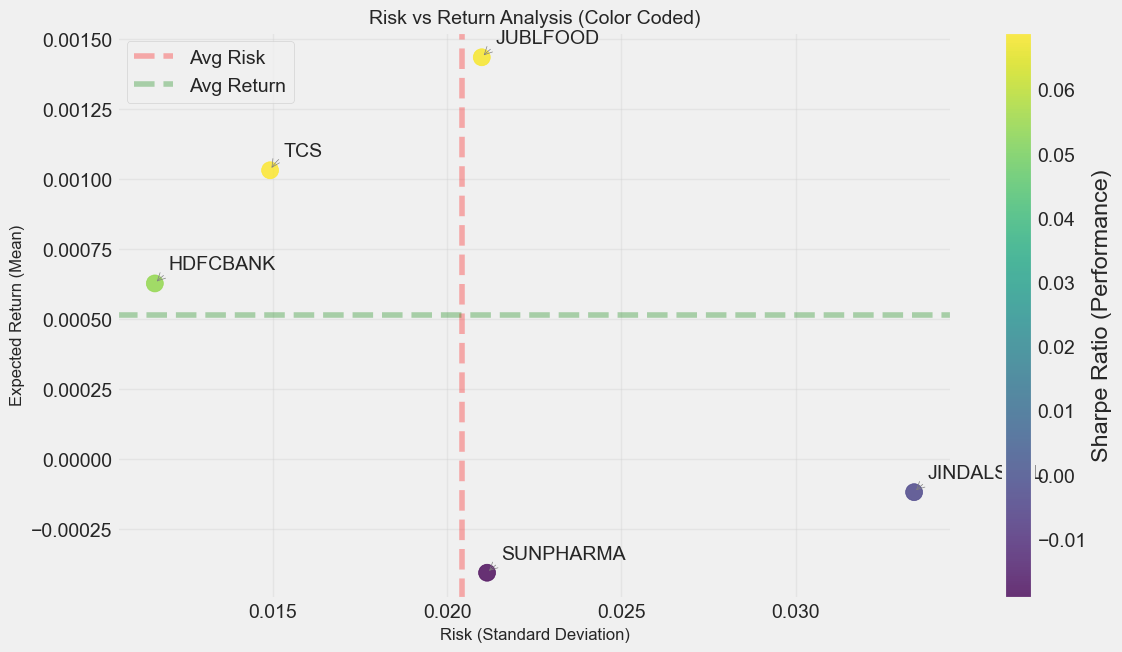

Stock with Highest Return: JUBLFOOD.NS
Stock with Lowest Risk: HDFCBANK.NS


In [12]:
plt.figure(figsize=(12, 7))

x = rets.std()
y = rets.mean()

sharpe = y / x 
plt.scatter(x, y, s=150, alpha=0.8, c=sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio (Performance)') 

plt.xlabel('Risk (Standard Deviation)', fontsize=12)
plt.ylabel('Expected Return (Mean)', fontsize=12)
plt.title('Risk vs Return Analysis (Color Coded)', fontsize=14)


for i, txt in enumerate(rets.columns):
    short_name = txt.replace('.NS', '')
    plt.annotate(
        short_name, 
        (x.iloc[i], y.iloc[i]), 
        xytext=(10, 10), 
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', color='gray')
    )


plt.axvline(x=x.mean(), color='red', linestyle='--', alpha=0.3, label='Avg Risk')
plt.axhline(y=y.mean(), color='green', linestyle='--', alpha=0.3, label='Avg Return')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

print("Stock with Highest Return:", y.idxmax())
print("Stock with Lowest Risk:", x.idxmin())


### **10. Conclusion & Data Export**
Summarizing the annualized performance metrics and saving the processed data for reporting.

In [ ]:
summary = pd.DataFrame({
    'Annualized Return': rets.mean() * 252,
    'Annualized Risk (Vol)': rets.std() * np.sqrt(252)
})

# CALCULATE SHARPE RATIO
summary['Sharpe Ratio'] = (summary['Annualized Return'] - risk_free_rate) / summary['Annualized Risk (Vol)']
summary = summary.sort_values(by='Sharpe Ratio', ascending=False)

print("--- ANNUAL PERFORMANCE SUMMARY (Sorted by Efficiency) ---")
print(summary)

summary.to_csv('stock_analysis_summary.csv')
df_combined.to_csv('stock_prices_clean.csv')

print("\nProject Complete! File 'stock_analysis_summary.csv' has been created successfully.")

--- ANNUAL PERFORMANCE SUMMARY (Sorted by Efficiency) ---
               Annualized Return  Annualized Risk (Vol)  Sharpe Ratio
Ticker                                                               
JUBLFOOD.NS             0.361261               0.333227      0.934080
TCS.NS                  0.259573               0.236773      0.885126
HDFCBANK.NS             0.157727               0.184251      0.584675
JINDALSTEL.NS          -0.030134               0.530227     -0.151132
SUNPHARMA.NS           -0.102635               0.335641     -0.454756

Project Complete! File 'stock_analysis_summary.csv' has been created successfully.
